# Master Production Planning

## What is the Master Production Schedule?

The MPS:
- is the basic communication between the market and manufacturing.
- is a statement of PRODUCTION not of the DEMAND.
  - Production might lag or lead forecasted demand.
  - Production might be in batches when demand is eaches.
- is a plan to meet the forecasted demand, not a forecast of demand.
- translates S&OP of a firm into a manufacturing plan in terms of quantities and timing.
- shows when products will be available in the future – when sales can promise them to customers.
- ties together the production and the sales.
- statement of planned future output for the firm.

## Production Strategies

### Pure Strategies
- **Level** – stable production => varying inventory
- **Chase** – varying production => stable inventory

### Hybrid Strategies
- **Outsourcing/Subcontracting**
  - Keep level production in-house
  - Outsource the variable component of demand
- **Optimal Cost Trade-offs**
  - Lot Sizing
  - Fixed Planning Horizon

## Fixed Planning Horizon Problem

### Objective
Find the production plan that minimises total costs given the following parameters:

<div style="display: flex;">

<div style="flex: 1; padding-right: 20px;">
  
### Demand
- Constant vs `Variable`
- `Known` vs Random
- `Continuous` vs Discrete

### Lead Time
- `Instantaneous`
- `Constant` or Variable (deterministic/stochastic)

### Dependence of Items
- `Independent`
- Correlated
- Indentured

### Review Time
- `Continuous`
- Periodic

### Number of Echelons
- `One`
- Multi (>1)

### Capacity / Resources
- `Unlimited`
- Limited / Constrained

</div>

<div style="flex: 1; padding-left: 20px;">

### Discounts
- `None`
- All Units or Incremental

### Excess Demand
- `None`
- All orders are backordered
- Lost orders
- Substitution

### Perishability
- `None`
- Uniform with time

### Planning Horizon
- Single Period
- `Finite Period`
- Infinite

### Number of Items
- `One`
- Many

### Form of Product
- `Single Stage`
- Multi-Stage

</div>

</div>

## Problem: Queenstown Gyroscopes

Your company, Queenstown Gyroscopes, has just received a one-year contract with Aussie Satellite Systems to provide 2,000 of your special Kiwi-99 gyroscopes.

The contract stipulates the exact number of gyroscopes to be shipped to them each month of the 12-month contract.


\begin{array}{|c|c|}
\hline
\text{Month} & \text{Demand} \\
\hline
1 & 200 \\
2 & 150 \\
3 & 100 \\
4 & 50 \\
5 & 50 \\
6 & 100 \\
7 & 150 \\
8 & 200 \\
9 & 200 \\
10 & 250 \\
11 & 300 \\
12 & 250 \\
\hline
\text{Total} & 2000 \\
\hline
\end{array}

### Costs
- Production Set Up Cost: $500 per run
- Cost per Gyroscope: $50 per item
- Holding Charge: 0.24 $/$/year
  - Thus, holding cost = $1.00 per item per month

### Other Information
- Gyroscopes manufactured in a period are ready for use in that period.
- Gyroscopes accrue no holding costs if consumed in the same month they are produced, but accrue for future months.

### Objective
Find the lowest cost production plan for Kiwi-99 gyroscopes for the 12-month contract.

## Approaches for Solving the FPH Problem

### Simple Heuristics
- One Time Run
- Lot for Lot (Chase)
- Fixed EOQ
- Periodic Order Quantity

### Specialised Heuristics
- Least Period Cost (Silver-Meal)
- Least Unit Cost
- Part-Period Balancing

### Optimal Methods
- Wagner-Whitin
- Mixed Integer Linear Program (MILP)


### Simple Heuristics - `One Time Run`


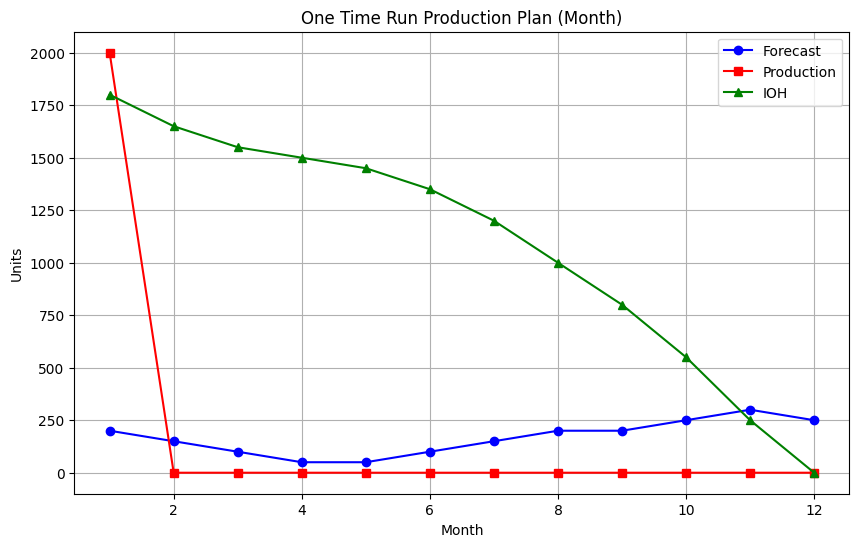

,Month,Forecast,Production,IOH,Holding Cost,Set-Up Costs,Total Cost
0,1,200,2000,1800,1800,500,2300
1,2,150,0,1650,1650,0,1650
2,3,100,0,1550,1550,0,1550
3,4,50,0,1500,1500,0,1500
4,5,50,0,1450,1450,0,1450
5,6,100,0,1350,1350,0,1350
6,7,150,0,1200,1200,0,1200
7,8,200,0,1000,1000,0,1000
8,9,200,0,800,800,0,800
9,10,250,0,550,550,0,550


In [1]:
from util.calculate_production_plan import calculate_one_time_run_production_plan

# Constants
total_production = 2000
setup_cost_per_run = 500
holding_cost_per_item_per_period = 1  # This could be per week or per month
period_demand = [200, 150, 100, 50, 50, 100, 150, 200, 200, 250, 300, 250]  # Weekly or monthly demand
output_directory = "figuers_&_result/one_time_run"
period_label = "Month"  # or "Week" depending on the demand data

# Calculate the production plan and store results
df_1tr, plot_path, df_path = calculate_one_time_run_production_plan(total_production, setup_cost_per_run, holding_cost_per_item_per_period, period_demand, output_directory, period_label)

df_1tr

### Simple Heuristics - `Lot for Lot (Chase)`
The Lot for Lot approach involves manufacturing the exact number of units required to meet the forecasted demand for each period. This approach typically results in no inventory on hand (IOH) at the end of each period, and there is a setup cost for each production run.

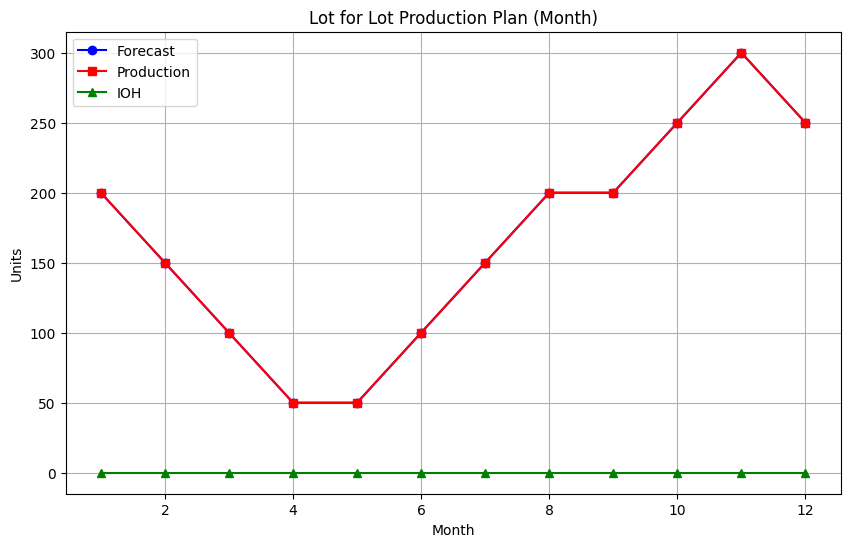

,Month,Forecast,Production,IOH,Holding Cost,Set-Up Costs,Total Cost
0,1,200,200,0,0,500,500
1,2,150,150,0,0,500,500
2,3,100,100,0,0,500,500
3,4,50,50,0,0,500,500
4,5,50,50,0,0,500,500
5,6,100,100,0,0,500,500
6,7,150,150,0,0,500,500
7,8,200,200,0,0,500,500
8,9,200,200,0,0,500,500
9,10,250,250,0,0,500,500


In [2]:
from util.calculate_production_plan import calculate_lot_for_lot_production_plan

# Constants
setup_cost_per_run = 500
holding_cost_per_item_per_period = 1  # This could be per week or per month
period_demand = [200, 150, 100, 50, 50, 100, 150, 200, 200, 250, 300, 250]  # Weekly or monthly demand
output_directory = "figuers_&_result/lot_for_lot"
period_label = "Month"  

# Calculate the production plan and store results
df_l4l, plot_path, df_path = calculate_lot_for_lot_production_plan(setup_cost_per_run, holding_cost_per_item_per_period, period_demand, output_directory, period_label)

df_l4l

### Simple Heuristics - `Fixed Order Quantity (FOQ)`

The Fixed Order Quantity (FOQ) approach involves ordering a fixed quantity of units whenever the forecasted demand exceeds the inventory on hand. This results in varying order periods but stable order quantities. Let's implement this approach with the provided details.

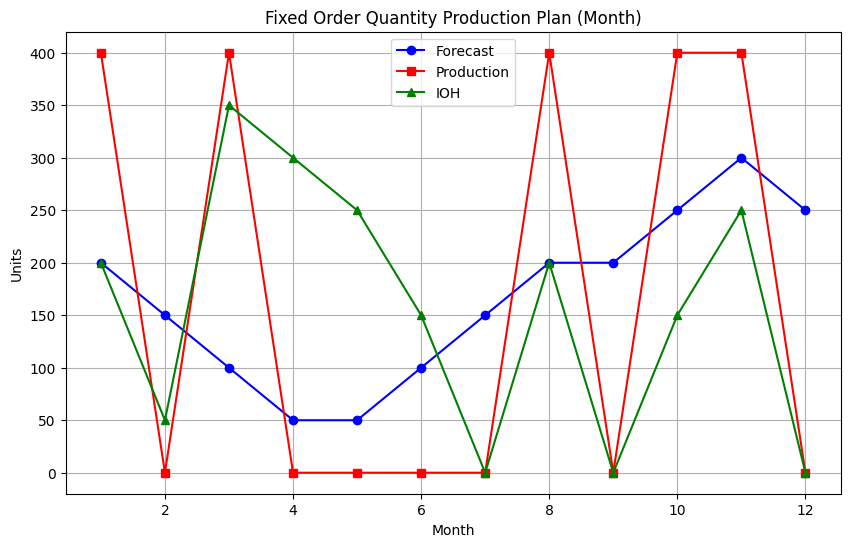

,Month,Forecast,Production,IOH,Holding Cost,Set-Up Costs,Total Cost
0,1,200,400,200,200,500,700
1,2,150,0,50,50,0,50
2,3,100,400,350,350,500,850
3,4,50,0,300,300,0,300
4,5,50,0,250,250,0,250
5,6,100,0,150,150,0,150
6,7,150,0,0,0,0,0
7,8,200,400,200,200,500,700
8,9,200,0,0,0,0,0
9,10,250,400,150,150,500,650


In [3]:
from util.calculate_production_plan import calculate_fixed_order_quantity_production_plan

# Constants
fixed_order_quantity = 400  # Q*
setup_cost_per_run = 500
holding_cost_per_item_per_period = 1  # This could be per week or per month
period_demand = [200, 150, 100, 50, 50, 100, 150, 200, 200, 250, 300, 250]  # Weekly or monthly demand
output_directory = "../figuers_&_result/fixed_order_quantity"
period_label = "Month"  # or "Week" depending on the demand data

# Calculate the production plan and store results
df_foq, plot_path_foq, df_path_foq = calculate_fixed_order_quantity_production_plan(fixed_order_quantity, setup_cost_per_run, holding_cost_per_item_per_period, period_demand, output_directory, period_label)

df_foq


### Simple Heuristics - `Periodic Order Quantity (POQ)`

The Periodic Order Quantity (POQ) approach involves ordering the sum of the forecasts for a fixed number of periods. This results in stable order intervals but varying order quantities.

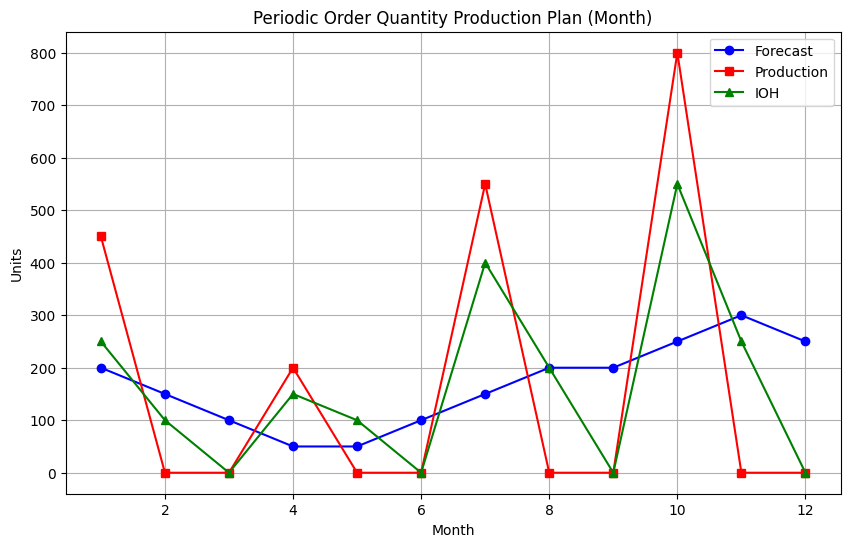

,Month,Forecast,Production,IOH,Holding Cost,Set-Up Costs,Total Cost
0,1,200,450,250,250,500,750
1,2,150,0,100,100,0,100
2,3,100,0,0,0,0,0
3,4,50,200,150,150,500,650
4,5,50,0,100,100,0,100
5,6,100,0,0,0,0,0
6,7,150,550,400,400,500,900
7,8,200,0,200,200,0,200
8,9,200,0,0,0,0,0
9,10,250,800,550,550,500,1050


In [4]:
from util.calculate_production_plan import calculate_periodic_order_quantity_production_plan

# Constants
order_period = 3  # T*
setup_cost_per_run = 500
holding_cost_per_item_per_period = 1  # This could be per week or per month
period_demand = [200, 150, 100, 50, 50, 100, 150, 200, 200, 250, 300, 250]  # Weekly or monthly demand
output_directory = "figuers_&_result/periodic_order_quantity"
period_label = "Month"  

# Calculate the production plan and store results
df_poq, plot_path, df_path = calculate_periodic_order_quantity_production_plan(order_period, setup_cost_per_run, holding_cost_per_item_per_period, period_demand, output_directory, period_label)

df_poq

In [5]:
from util.calculate_production_plan import calculate_and_compare_metrics

demand_data = [200, 150, 100, 50, 50, 100, 150, 200, 200, 250, 300, 250]
dfs = [df_1tr, df_l4l, df_foq, df_poq]
approaches = ['One Time Run', 'Lot for Lot', 'FOQ', 'POQ']

comparison_df = calculate_and_compare_metrics(demand_data, dfs, approaches)
comparison_df

,Approach,Inventory Costs,Set-Up Costs,Total Costs,Avg Monthly IOH,Inventory Turns
0,One Time Run,13100,500,13600,1091.7,1.8
1,Lot for Lot,0,6000,6000,0.0,inf
2,FOQ,1900,2500,4400,158.3,12.6
3,POQ,2000,2000,4000,166.7,12.0


### Summary

- **One Time Run** incurs the highest inventory costs due to the large initial production, which leads to substantial holding costs over time. While it is very simple to implement and quick to execute, it is not cost-effective when considering the holding costs involved.
- **Lot for Lot** eliminates holding costs entirely by producing exactly what is needed for each period. However, it incurs the highest setup costs due to frequent production runs. This approach is ideal when setup costs are low or negligible, making it a good choice for environments where flexibility is key.

- **Fixed Order Quantity (FOQ)** offers a balanced strategy, reducing both inventory and setup costs. It achieves a higher inventory turn rate, indicating efficient inventory management. This method is effective in environments where stable order quantities are feasible, providing a middle ground between holding and setup costs.
- **Periodic Order Quantity (POQ)**, similar to FOQ, balances inventory and setup costs effectively. It requires less frequent production runs compared to Lot for Lot, thereby reducing setup costs while maintaining manageable holding costs. This approach works well in scenarios where periodic reviews and adjustments are practical.

Each approach has its strengths and weaknesses. The choice of method depends on the specific context, including demand variability, setup costs, and holding costs. Understanding these factors helps in selecting the most cost-effective and efficient production strategy for the given production environment.